# Zomato Data Analysis Project using Python

### **Import all the required libraries**

1. Pandas used for Data Manipulation & Data Analysis.
2. Numpy used for data Numerical Operation.
3. Matplotlib & Seaborn are used for Data Visualization.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### **Read data as Dataframe**

In [26]:
zomato_data = pd.read_csv("/content/Zomato_Data.csv")
zomato_data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


### **Let's convert the data type of the "rate" column to float & remove the denominator**

N.B.: Rating is given out of 5

In [27]:
def handleRate(value):
  value = str(value).split("/")[0]
  return float(value)

zomato_data["rate"] = zomato_data["rate"].apply(handleRate)
zomato_data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


### **Summary of data**

In [28]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Conclusion: There is no null value.

### **Type of Resturant**

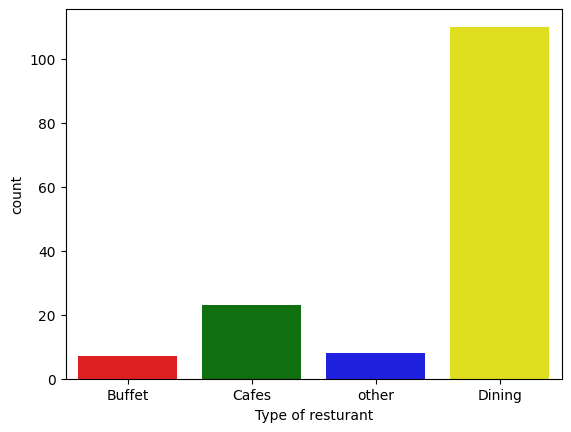

In [29]:
sns.countplot(x = zomato_data["listed_in(type)"], palette = ['red','green', 'blue', 'yellow'])
plt.xlabel("Type of resturant")
plt.show()

Conclusion: The majority of the resturant fall into the dining category.


**Dining resturant are preferred by a larger number of individuals**

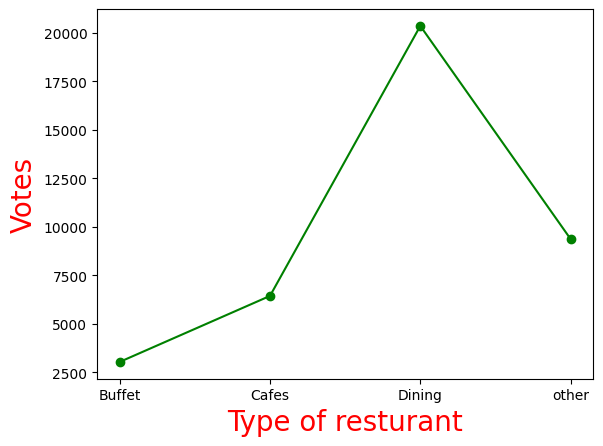

In [30]:
grouped_data = zomato_data.groupby("listed_in(type)")["votes"].sum()
result = pd.DataFrame({"votes" : grouped_data})
plt.plot(result, c = "green", marker = "o")
plt.xlabel("Type of resturant", c = "red", size = 20)
plt.ylabel("Votes", c = "red", size = 20)
plt.show()

Conclusion: The majority of resturant received ratings.

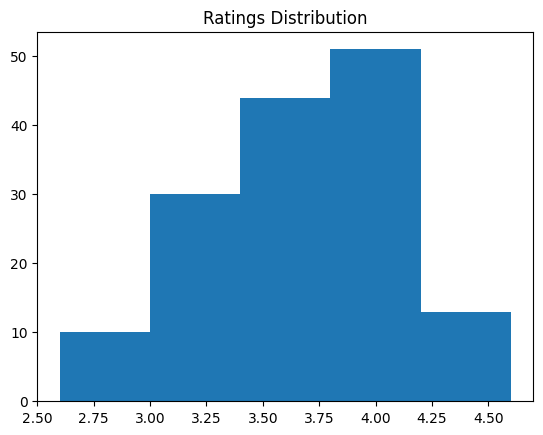

In [31]:
plt.hist(zomato_data['rate'], bins = 5)
plt.title("Ratings Distribution")
plt.show()

Conclusion: The majority of resturants received ratings ranging from 3.5 to 4.

Tha majority of couples prefer resturants with an approximate cost of 300 rupees.

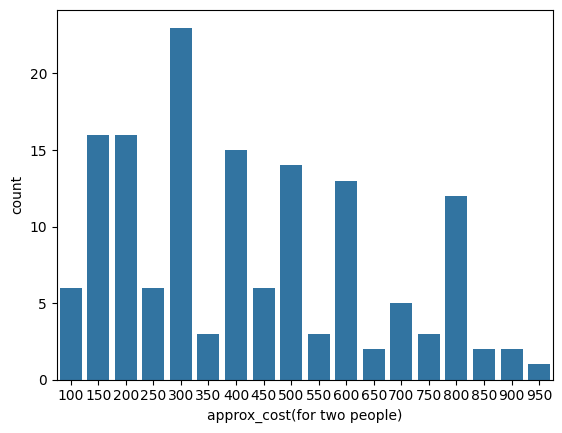

In [32]:
couple_data = zomato_data['approx_cost(for two people)']
sns.countplot(x = couple_data)
plt.show()

Conslusion: Whether online orders receiv higher ratings that offline orders.

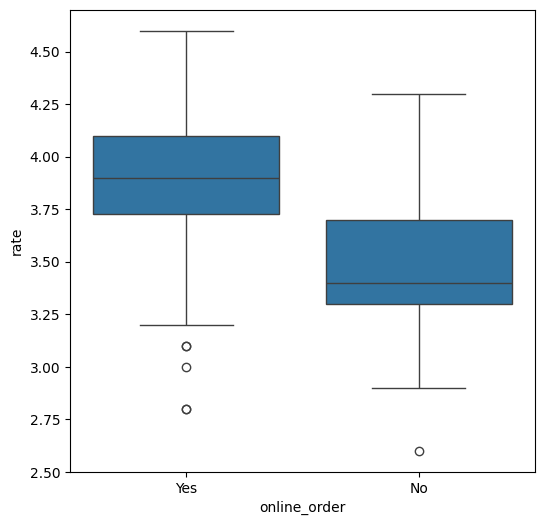

In [33]:
plt.figure(figsize = (6,6))
sns.boxplot(x = "online_order", y = "rate", data = zomato_data)
plt.show()

Conclusion: Offline orders received lower rating in comprasion to online orders, which obtained excellent ratings.

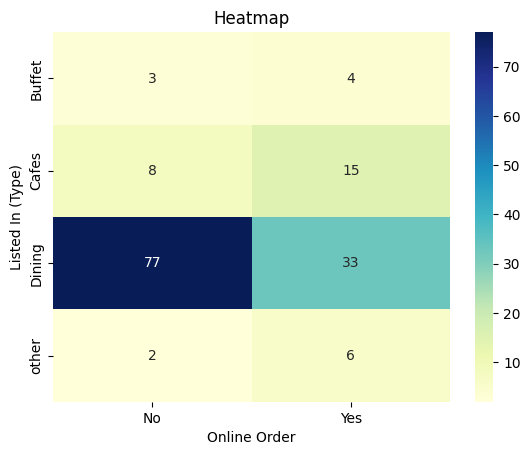

In [34]:
pivotal_table = zomato_data.pivot_table(index = "listed_in(type)", columns = "online_order", aggfunc = "size", fill_value = 0)
sns.heatmap(pivotal_table, annot = True, cmap = "YlGnBu", fmt = "d")
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

Conclusion: Dining resturants primarily acpt offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at resturants, but prefer online ordering at cafes.